In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(5)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
df.shape

(29451, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


# Data Cleaning

In [6]:
df.duplicated().sum()

401

In [7]:
df = df.drop_duplicates(keep='first')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [10]:
df.shape

(29050, 12)

# EDA

In [11]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [12]:
df['POSTED_BY'].value_counts()

Dealer     17961
Owner      10470
Builder      619
Name: POSTED_BY, dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

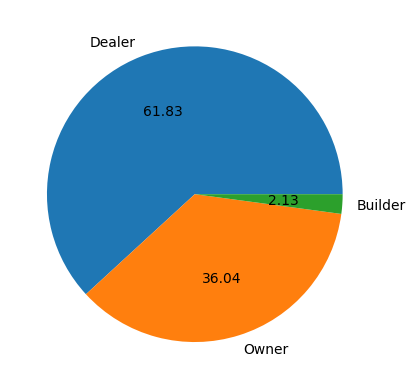

In [14]:
plt.pie(df['POSTED_BY'].value_counts(), labels=['Dealer','Owner','Builder'],autopct="%0.2f")
plt.show()

In [15]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29050.000000,29050.000000,29050.000000,2.905000e+04,29050.000000,29050.000000,29050.000000,29050.000000,29050.000000
mean,0.178967,0.315869,2.390809,2.003171e+04,0.821033,0.930361,21.270272,76.829585,141.712677
std,0.383332,0.464869,0.880677,1.914411e+06,0.383332,0.254541,6.195973,10.567572,650.055763
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000000e+02,1.000000,1.000000,18.452663,73.794800,38.000000
50%,0.000000,0.000000,2.000000,1.172742e+03,1.000000,1.000000,20.631532,77.322873,61.750000
75%,0.000000,1.000000,3.000000,1.550169e+03,1.000000,1.000000,26.886881,77.912934,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


C:\Users\Soumyadeep\AppData\Local\Temp\ipykernel_10176\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

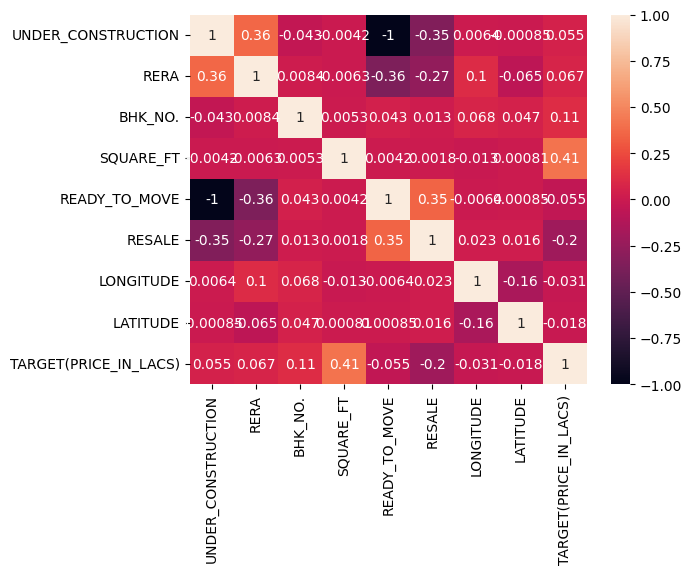

In [16]:
sns.heatmap(df.corr(),annot=True)

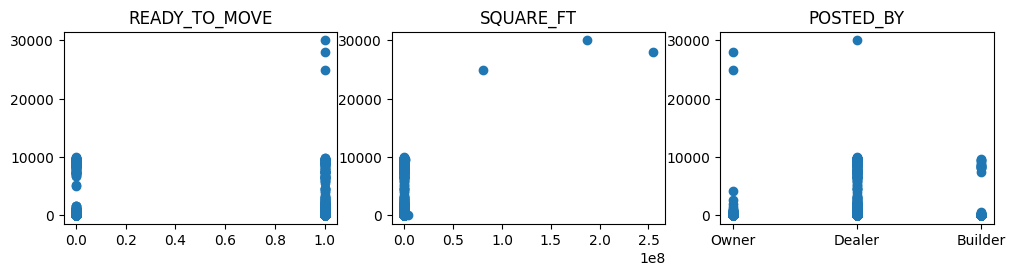

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))

ax1.scatter(df['READY_TO_MOVE'], df['TARGET(PRICE_IN_LACS)'])
ax1.set_title("READY_TO_MOVE")
ax2.scatter(df['SQUARE_FT'], df['TARGET(PRICE_IN_LACS)'])
ax2.set_title("SQUARE_FT")
ax3.scatter(df['POSTED_BY'], df['TARGET(PRICE_IN_LACS)'])
ax3.set_title("POSTED_BY")

plt.show()

In [18]:
#Using Get Dummies
pd.get_dummies(df,df.columns[df.dtypes == 'object'])

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Builder,...,"ADDRESS_vasundhara nagar,Jalna","ADDRESS_veeraragavalu Nagar, Vinayagapuram, Kathirvedu Village, Ambattur Taluk,Chennai","ADDRESS_vidyut nagar,Rajkot","ADDRESS_vikas nagar,Karnal","ADDRESS_vinayaka,Varanasi","ADDRESS_virar,Palghar","ADDRESS_vishakoderu,Bhimavaram","ADDRESS_walkeshwari nagari,Jamnagar","ADDRESS_west mambalam,Chennai","ADDRESS_yelahanka/Jakkur,Bangalore"
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,0,0,3,2500.000000,1,1,27.140626,78.043277,45.0,0,...,0,0,0,0,0,0,0,0,0,0
29447,0,0,2,769.230769,1,1,39.945409,-86.150721,16.0,0,...,0,0,0,0,0,0,0,0,0,0
29448,0,0,2,1022.641509,1,1,26.928785,75.828002,27.1,0,...,0,0,0,0,0,0,0,0,0,0
29449,0,0,2,927.079009,1,1,12.900150,80.227910,67.0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
for i in df.columns[df.dtypes == 'object']:
    print(i,"::",df[i].unique())

POSTED_BY :: ['Owner' 'Dealer' 'Builder']
BHK_OR_RK :: ['BHK' 'RK']
ADDRESS :: ['Ksfc Layout,Bangalore' 'Vishweshwara Nagar,Mysore' 'Jigani,Bangalore'
 ... 'west mambalam,Chennai' 'Gandhi Nagar,Gulbarga'
 'E3-108, Lake View Recidency,,Vapi']


In [20]:
df1=df
# Using Categorical dtypes
for i in df.columns[df.dtypes == 'object']:
    print(i,"::")
    df1[i] = df[i].astype('category')
    df1[i] = df[i].cat.codes

POSTED_BY ::
BHK_OR_RK ::
ADDRESS ::


In [21]:
df1.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,2,0,0,2,0,1300.236407,1,1,2844,12.969910,77.597960,55.0
1,1,0,0,2,0,1275.000000,1,1,6576,12.274538,76.644605,51.0
2,2,0,0,2,0,933.159722,1,1,2256,12.778033,77.632191,43.0
3,2,0,1,2,0,929.921143,1,1,5095,28.642300,77.344500,62.5
4,1,1,0,2,0,999.009247,0,1,3830,22.592200,88.484911,60.5


In [22]:
df1.shape

(29050, 12)

In [23]:
X=df1.iloc[:,0:11]

In [24]:
X

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,2,0,0,2,0,1300.236407,1,1,2844,12.969910,77.597960
1,1,0,0,2,0,1275.000000,1,1,6576,12.274538,76.644605
2,2,0,0,2,0,933.159722,1,1,2256,12.778033,77.632191
3,2,0,1,2,0,929.921143,1,1,5095,28.642300,77.344500
4,1,1,0,2,0,999.009247,0,1,3830,22.592200,88.484911
...,...,...,...,...,...,...,...,...,...,...,...
29446,2,0,0,3,0,2500.000000,1,1,5594,27.140626,78.043277
29447,2,0,0,2,0,769.230769,1,1,1510,39.945409,-86.150721
29448,1,0,0,2,0,1022.641509,1,1,150,26.928785,75.828002
29449,2,0,0,2,0,927.079009,1,1,5707,12.900150,80.227910


In [25]:
y=df['TARGET(PRICE_IN_LACS)']

# Model Building

In [26]:
#Importing all libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearnex import patch_sklearn
patch_sklearn(global_patch=True)
import sklearn
print(sklearn.__version__)

Scikit-learn was successfully globally patched by Intel(R) Extension for Scikit-learn
1.2.1


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [28]:
# create regressor object
knn = KNeighborsRegressor(n_neighbors=2,algorithm='brute',n_jobs=-1)

In [29]:
regr = knn
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
mae =mean_absolute_error(y_test,y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test,y_pred)
print("mean_absolute_error:-",mae)
print('Root Mean Squared Error:', rmse)
print("r2_score:-",r2)


mean_absolute_error:- 57.43449225473322
Root Mean Squared Error: 224.24352158942716
r2_score:- 0.8922120890884797


In [30]:
residual = y_test - y_pred


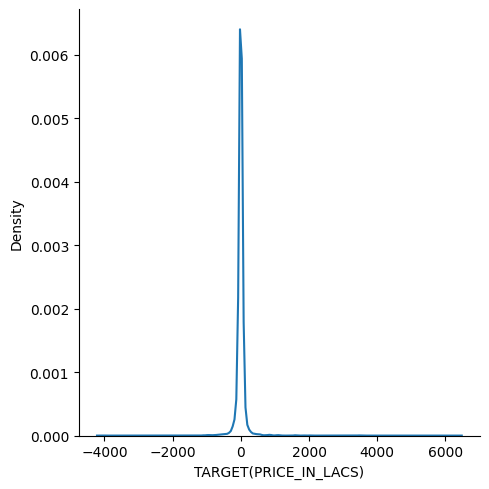

In [31]:
sns.displot(residual,kind='kde')

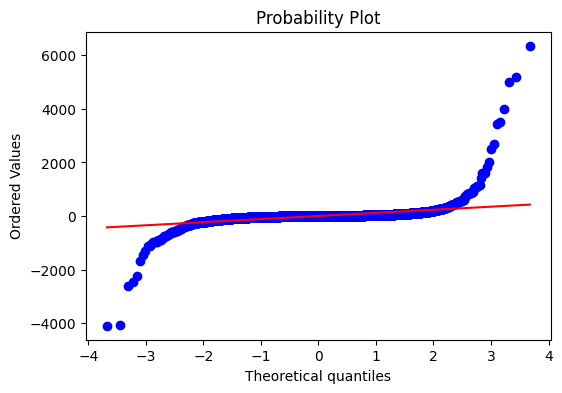

In [32]:
# QQ Plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

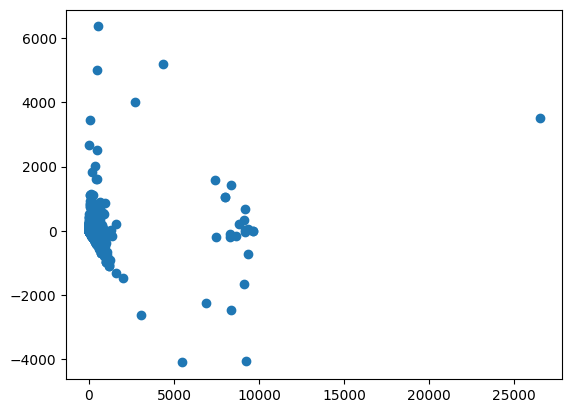

In [33]:
plt.scatter(y_pred,residual)

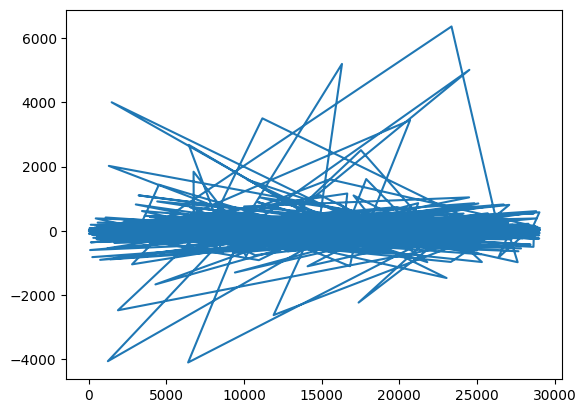

In [34]:
plt.plot(residual)

# Testing the model

In [35]:
df_test = pd.read_csv('test.csv')

In [36]:
df_test.sample(5)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
32606,Dealer,0,0,2,BHK,800.000000,1,1,"Santacruz (East),Maharashtra",19.091600,72.858100
6177,Owner,0,0,2,BHK,750.000000,1,1,"Guruvayoor,Thrissur",10.595000,76.036390
6396,Dealer,0,1,2,BHK,1050.000000,1,1,"Crossing Republik,Ghaziabad",28.629811,77.434197
29795,Dealer,0,0,1,BHK,610.042234,1,1,"Phase-1 Petali,Mumbai",30.458937,76.581350
57942,Owner,0,0,2,BHK,787.180208,1,1,"Pratiraksha Nagar,Kolkata",22.541110,88.337780


In [37]:
df2=df_test
# Using Categorical dtypes
for i in df.columns[df.dtypes == 'object']:
    print(i,"::")
    df2[i] = df_test[i].astype('category')
    df2[i] = df_test[i].cat.codes

In [38]:
X_test=df1.iloc[:,0:11]

In [39]:
y_test=df['TARGET(PRICE_IN_LACS)']

In [40]:
prediction = regr.predict(X_test)
mae =mean_absolute_error(y_test,prediction)
rmse = mean_squared_error(y_test, prediction, squared=False)
r2 = r2_score(y_test,prediction)
print("mean_absolute_error:-",mae)
print('Root Mean Squared Error:', rmse)
print("r2_score:-",r2)

mean_absolute_error:- 35.72242633390706
Root Mean Squared Error: 178.96566681489497
r2_score:- 0.9242027987378968
